# Demo for the AUS2200 intake catalogue

### How to load output for an experiment without knowledge where the output lives on NCI

In [1]:
import intake
import cf_xarray

In [2]:
catalog = intake.open_catalog('/g/data/ua8/Working/packages/aus2200-intake/catalogue.yaml')

List all the datasets available.

In [3]:
list(catalog)

['ashwed80', 'ashwed83', 'canberra03', 'combined']

At the moment we have one dataset for each separate simulation and a combined dataset which includes all simulations.

## Example of dataset for a single simulation: canberra03

In [4]:
experiment = catalog['canberra03']
experiment.description

'A limited area model study of the entire Australian continent at 2.2 km resolution, using the UM atmospheric model. ERA5+ERA5Land reanalysis data was used to provide initial and boundary conditions. The study covers the time period of 2003-01-16 to 2003-01-19, including the 2003 Canberra bushfires.\nThis dataset is part of the AUS2200 simulations collection at NCI.\n'

What are the available variables?

In [5]:
experiment.unique()['variable']

['amdry',
 'amwet',
 'clhigh',
 'cllow',
 'clmed',
 'clmxro',
 'hus',
 'huss',
 'nflash',
 'pralsns',
 'pralsprof',
 'ps',
 'psl',
 'reflmax',
 'storm',
 'tas',
 'tdps',
 'ts',
 'uas',
 'vas',
 'wsgmax10m',
 'cl',
 'cli',
 'clw',
 'eow',
 'estot',
 'evspsbl',
 'grplmxrat',
 'hfls',
 'hfss',
 'mrso',
 'mrsol',
 'pfull',
 'phalf',
 'refl',
 'ta',
 'ua',
 'va',
 'wa',
 'rainmxrat',
 'rlds',
 'rls',
 'rlut',
 'rsds',
 'rsdsdiff',
 'rsdsdir',
 'rsdt',
 'rss',
 'rsut',
 'theta',
 'tke',
 'z0',
 'zmla',
 'lmask',
 'orog']

Let's get one (e.g., the temperature) and do some super-duper analysis!

In [6]:
ds = experiment.search(variable='tas', frequency="1hr").to_dask()
ds

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 96, bnds: 2, lat: 2120, lon: 2600)
Coordinates:
  * time       (time) datetime64[ns] 768B 2003-01-16T00:29:59.999999872 ... 2...
  * lat        (lat) float64 17kB -48.79 -48.77 -48.75 ... -6.871 -6.852 -6.832
  * lon        (lon) float64 21kB 107.5 107.5 107.6 107.6 ... 158.9 159.0 159.0
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 34kB dask.array<chunksize=(2120, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 42kB dask.array<chunksize=(2600, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1060, 1300), meta=np.ndarray>
Attributes: (12/55)
    Conventions:                     CF-1.7 ACDD1.3
    contact:                         dsroberts@unimelb.edu.au
    contributor_email:               paola.petrelli@utas.edu.au, sam.green@un...
    contributor_name:                Paola Petrelli, Samuel Green
    contributor_role:                data_curator, data_curator
    contributor_url:                 https://orcid.org/0000-0002-0164-5105, h...
    ...                              ...
    intake_esm_attrs:variable:       tas
    intake_esm_attrs:experiment_id:  canberra03
    intake_esm_attrs:frequency:      1hr
    intake_esm_attrs:date_range:     200301160030-200301192330
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          v1-0.1hr.tas

In [7]:
tas = ds['tas']
tas

<xarray.DataArray 'tas' (time: 96, lat: 2120, lon: 2600)> Size: 2GB
dask.array<open_dataset-tas, shape=(96, 2120, 2600), dtype=float32, chunksize=(1, 1060, 1300), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 768B 2003-01-16T00:29:59.999999872 ... 200...
  * lat      (lat) float64 17kB -48.79 -48.77 -48.75 ... -6.871 -6.852 -6.832
  * lon      (lon) float64 21kB 107.5 107.5 107.6 107.6 ... 158.9 159.0 159.0
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (for access 1.5 meters) air temperature
    units:          K
    cell_methods:   area: mean time: mean
    cell_measures:  area: areacella
    history:        2023-10-19T06:04:25Z altered by CMOR: Treated scalar dime...

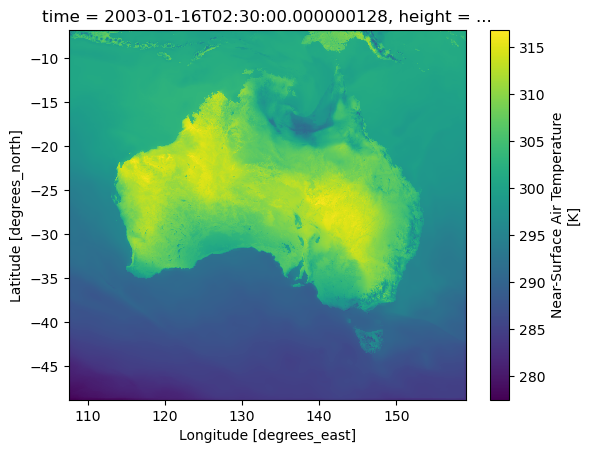

In [8]:
tas.cf.sel(time = '2003-01-16T02:30:00').plot()

Plot a Hovmoller

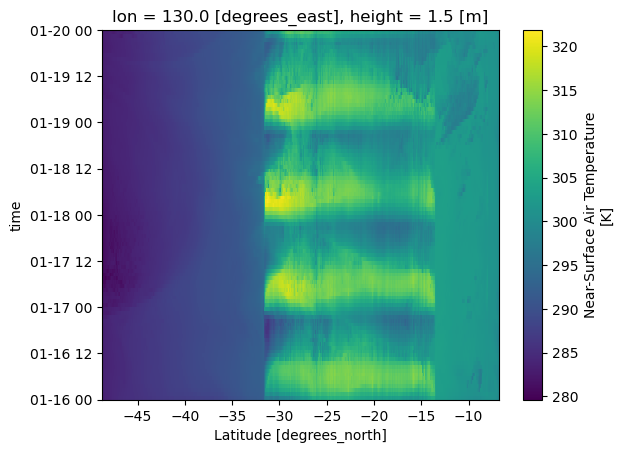

In [9]:
tas.cf.sel(longitude = 130, method='nearest').plot()